In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison

dotenv.load_dotenv(dotenv.find_dotenv())

True

/home/csverst/Github/CtDBenchmark/


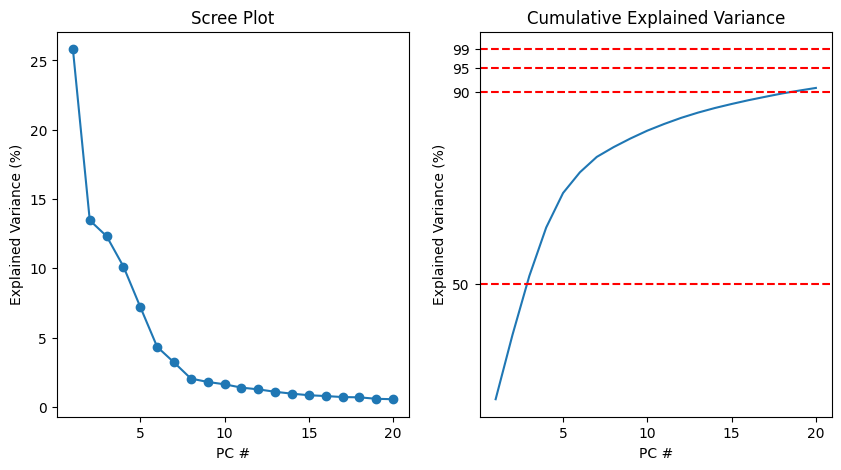

In [2]:

HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240422_MultiTask_NoisyGRU_Final/max_epochs=500 latent_size=64 seed=0/'
# pathGRU = pathTT + '20240412_Fig1_MultiTask_GRU_DT_Seeds/'
# pathVanilla = pathTT + '20240401_VanillaRNN_DT_Final/'
# pathNODE = pathTT + '20240401_NODE_DT_Final/'
# pathLFADS = pathTT + '20240402_NBFF_LFADS_DT_WDecay_Sweep2/gen_model=GRU_RNN prefix=20240328_NBFF_GRU_Final seed=0 max_epochs=1500 weight_decay=1e-05/'

an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)
an_TT.plot_scree(max_pcs= 20)

# an_GRU = Analysis_DT(run_name = "GRU", filepath = pathGRU, model_type = "SAE")
# an_Vanilla = Analysis_DT(run_name = "Vanilla", filepath = pathVanilla, model_type = "SAE")
# an_NODE = Analysis_DT(run_name = "NODE", filepath = pathNODE, model_type = "SAE")
# an_LFADS = Analysis_DT(run_name = "LFADS", filepath = pathLFADS, model_type = "LFADS")

path_GRU_Sweep = pathTT + "20240425_Fig1_GRU_MultiTask/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

path_Vanilla_Sweep = pathTT + "20240425_Fig1_VanillaRNN_MultiTask/"
subfolders_Vanilla = [f.path for f in os.scandir(path_Vanilla_Sweep) if f.is_dir()]

# path_NODE_Sweep = pathTT + "20240412_Fig1_MultiTask_NODE_DT_Seeds/"
# subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]

path_LFADS_Sweep = pathTT + "20240425_Fig1_LFADS_MultiTask/"
subfolders_LFADS = [f.path for f in os.scandir(path_LFADS_Sweep) if f.is_dir()]

In [3]:
comparison = Comparison(comparison_tag="Figure1MultiTask")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")
# comparison.load_analysis(an_GRU, group = "GRU")
# comparison.load_analysis(an_Vanilla, group = "Vanilla")
# comparison.load_analysis(an_NODE, group = "NODE")
# comparison.load_analysis(an_LFADS, group = "LFADS")

for subfolder in subfolders_GRU:
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "GRU")

for subfolder in subfolders_Vanilla:
    
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "Vanilla", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "Vanilla")

# for subfolder in subfolders_NODE:
    
#     subfolder = subfolder + "/"
#     analysis_temp = Analysis_DT(run_name = "NODE", filepath = subfolder, model_type = "SAE")
#     comparison.load_analysis(analysis_temp, group = "NODE")

# for subfolder in subfolders_LFADS:
        
#         subfolder = subfolder + "/"
#         analysis_temp = Analysis_DT(run_name = "LFADS", filepath = subfolder, model_type = "LFADS")
#         comparison.load_analysis(analysis_temp, group = "LFADS")

comparison.regroup()

Working on 1 of 11: GRU
Group: GRU
Rate R2: 0.9518339302586216
State R2: 0.96126326890781
Working on 2 of 11: GRU
Group: GRU
Rate R2: 0.9236851603950285
State R2: 0.9408943566672457
Working on 3 of 11: GRU
Group: GRU
Rate R2: 0.9137932976238529
State R2: 0.9442318223115824
Working on 4 of 11: GRU
Group: GRU
Rate R2: 0.9544147109244783
State R2: 0.966250755490554
Working on 5 of 11: GRU
Group: GRU
Rate R2: 0.8995962817425897
State R2: 0.9512210572513451
Working on 6 of 11: TT
Group: TT
Working on 7 of 11: Vanilla
Group: Vanilla
Rate R2: 0.25215863327164995
State R2: 0.3298421114013696
Working on 8 of 11: Vanilla
Group: Vanilla
Rate R2: 0.0018736967484073142
State R2: 0.0529019577028959
Working on 9 of 11: Vanilla
Group: Vanilla
Rate R2: 0.055374937517807366
State R2: 0.14711786653296816
Working on 10 of 11: Vanilla
Group: Vanilla
Rate R2: 0.253255654221406
State R2: 0.3269133726873156
Working on 11 of 11: Vanilla
Group: Vanilla
Rate R2: 0.4017217993172999
State R2: 0.25793838483696513


array([[0.95183393, 0.96126327],
       [0.92368516, 0.94089436],
       [0.9137933 , 0.94423182],
       [0.95441471, 0.96625076],
       [0.89959628, 0.95122106],
       [0.        , 0.        ],
       [0.25215863, 0.32984211],
       [0.0018737 , 0.05290196],
       [0.05537494, 0.14711787],
       [0.25325565, 0.32691337],
       [0.4017218 , 0.25793838]])

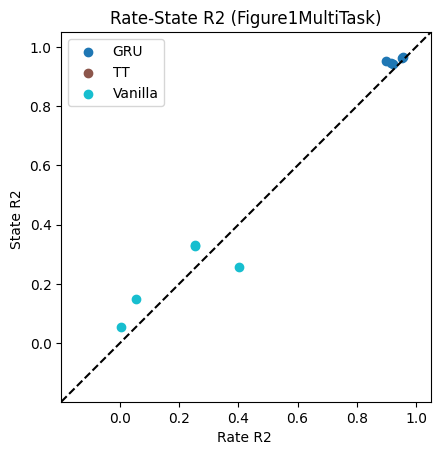

In [4]:
# comparison.compare_performance()
# comparison.compare_CCA(num_components=5)

comparison.compare_state_rate_r2(save_pdf = True)


In [5]:

import torch
phase= "val"
model_num = 9
rates, latents = comparison.analyses[model_num].get_model_outputs(phase=phase)
true_rates = comparison.analyses[model_num].get_true_rates(phase=phase)

rates_stack = []
latents_stack = []
true_rates_stack = []

trial_lens = analysis_temp.get_trial_lens(phase = phase)
# Stack the latents to the different trial lengths
for j in range(latents.shape[0]):
    latents_stack.append(
        latents[j, : int(trial_lens[j]), :]
    )
    rates_stack.append(
        rates[j, : int(trial_lens[j]), :]
    )
    true_rates_stack.append(
        true_rates[j, : int(trial_lens[j]), :]
    )
rates = torch.vstack(rates_stack)
latents = torch.vstack(latents_stack)
true_rates = torch.vstack(true_rates_stack)



(217252, 50)
(217252, 50)
[0.23809056 0.16129973 0.29436946 0.43079378 0.22154963 0.20697273
 0.2577318  0.22503715 0.17161365 0.17600093 0.0969217  0.35255466
 0.19302531 0.17260262 0.27995771 0.31335654 0.36551937 0.28356138
 0.56796124 0.26764919 0.30797413 0.5530743  0.08838529 0.36003962
 0.30579732 0.31841771 0.1208515  0.14038916 0.36304251 0.08476515
 0.21671192 0.33550445 0.31379622 0.10292671 0.31505293 0.34805185
 0.36315055 0.20051694 0.22163343 0.25245837 0.16322822 0.1505333
 0.2672768  0.23689624 0.14006499 0.30251671 0.2257418  0.17811159
 0.19237677 0.21717786]
(50,)


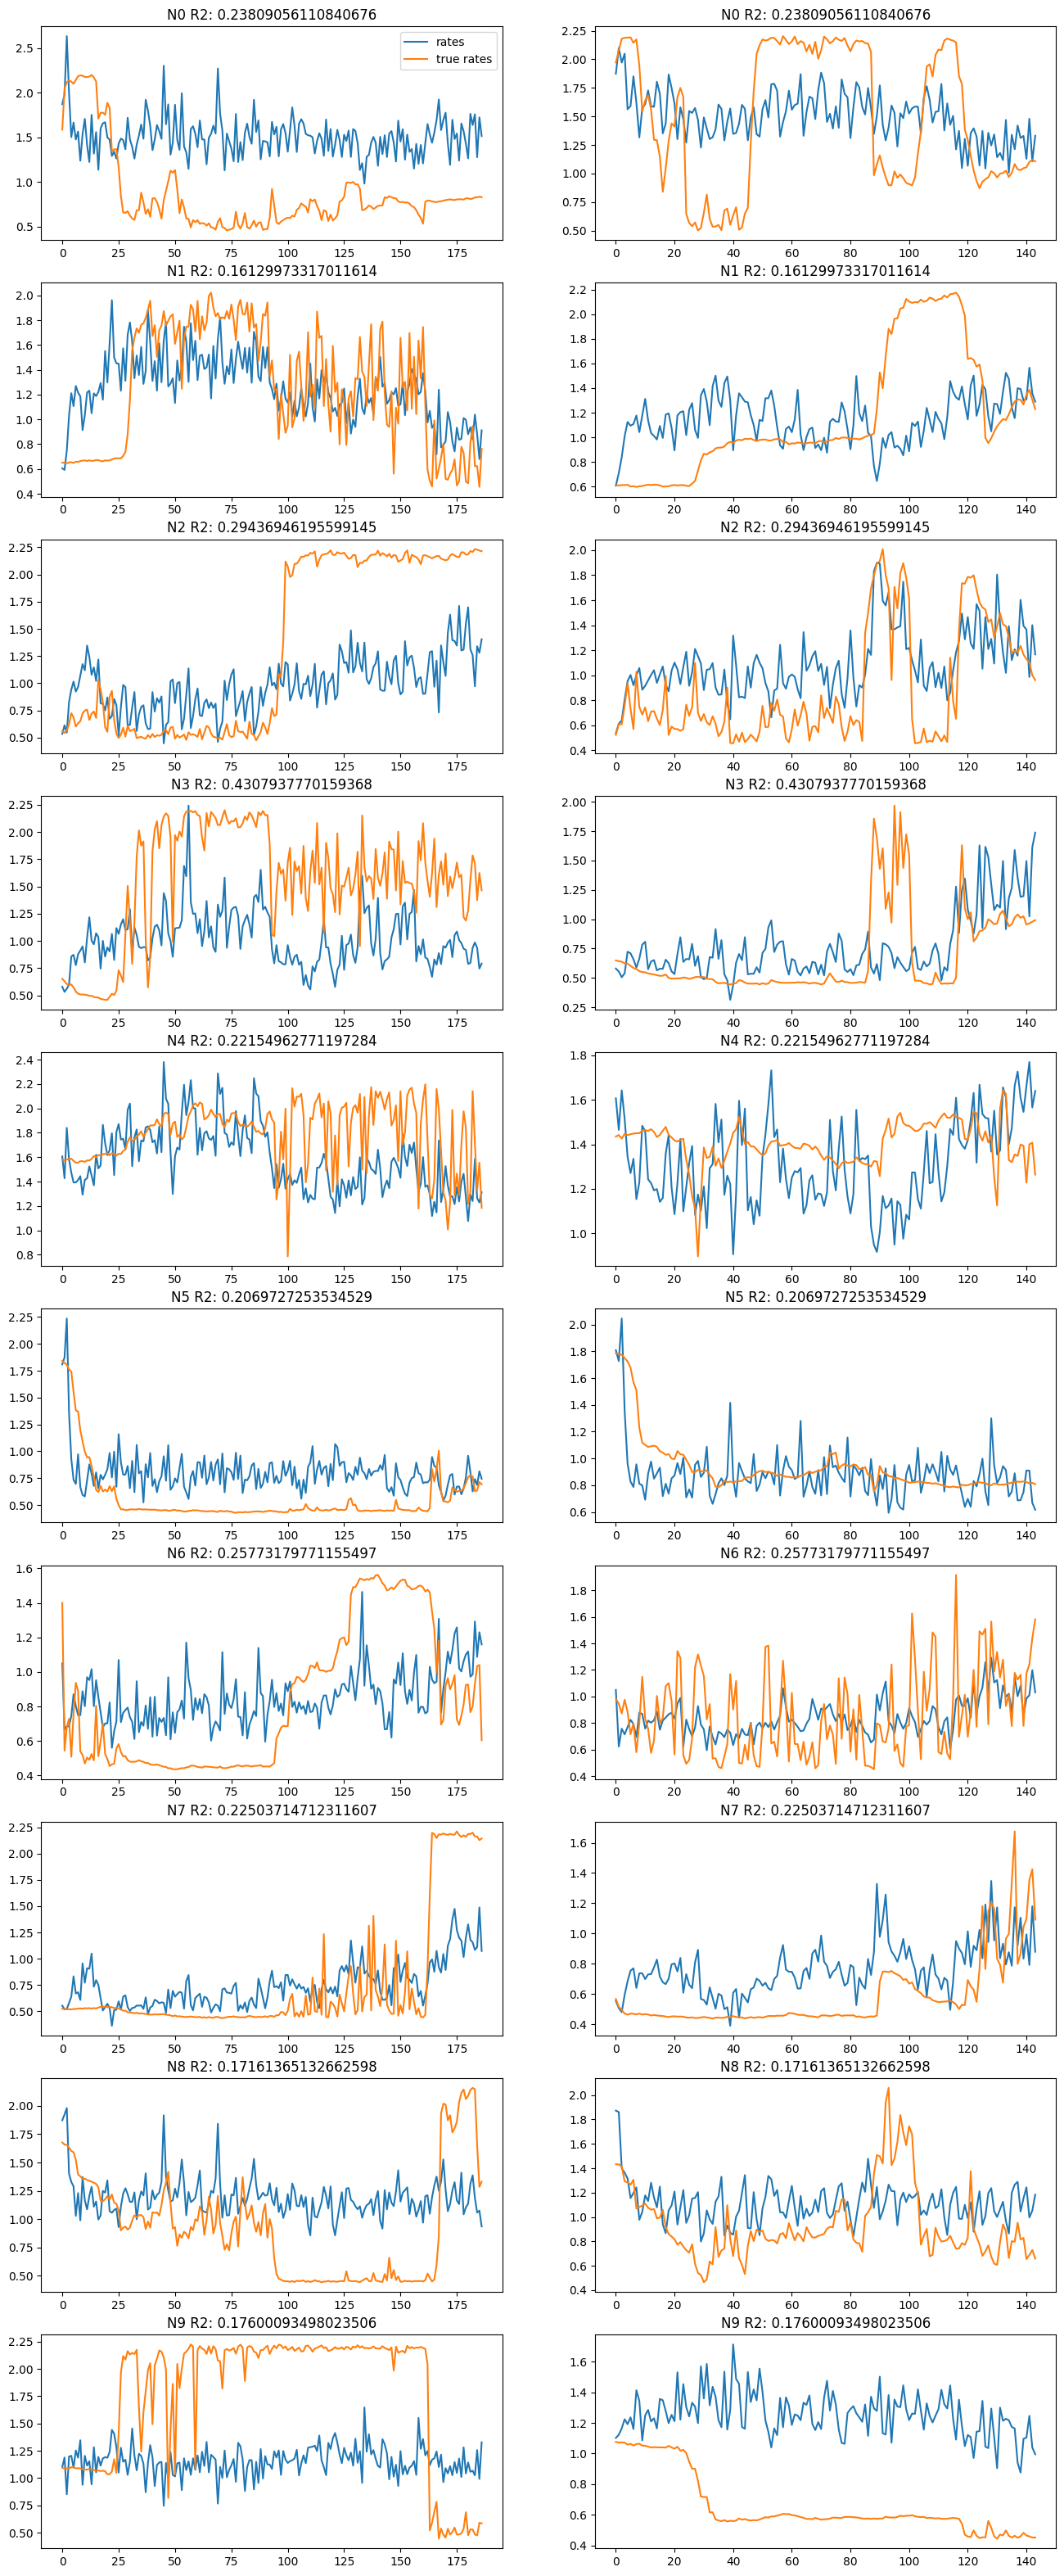

In [6]:
from sklearn.metrics import r2_score
tr_np = true_rates.detach().cpu().numpy()
rates_np = rates.detach().cpu().numpy()

print(tr_np.shape)
print(rates_np.shape)

r2 = r2_score(tr_np, rates_np, multioutput='raw_values')
print(r2)
print(r2.shape)

neurons_to_plot= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
trials_to_plot = [0,1]
fig = plt.figure(figsize=( 8*len(trials_to_plot),4*len(neurons_to_plot),))
axes = fig.subplots(len(neurons_to_plot), len(trials_to_plot))
for i in range(len(neurons_to_plot)):
    for j in range(len(trials_to_plot)):
        
        ax = axes[i,j]
        
        rates_plot = rates_stack[trials_to_plot[j]][:, neurons_to_plot[i]].detach().numpy()
        true_rates_plot = true_rates_stack[trials_to_plot[j]][:, neurons_to_plot[i]].detach().numpy()
        if i ==0 and j == 0:
            ax.plot(rates_plot, label = "rates")
            ax.plot(true_rates_plot, label = "true rates")
            ax.legend()
        else:
            ax.plot(rates_plot, label = "rates")
            ax.plot(true_rates_plot, label = "true rates")
        ax.set_title(f"N{neurons_to_plot[i]} R2: {r2[neurons_to_plot[i]]}")
        




In [7]:

print(r2)

[0.23809056 0.16129973 0.29436946 0.43079378 0.22154963 0.20697273
 0.2577318  0.22503715 0.17161365 0.17600093 0.0969217  0.35255466
 0.19302531 0.17260262 0.27995771 0.31335654 0.36551937 0.28356138
 0.56796124 0.26764919 0.30797413 0.5530743  0.08838529 0.36003962
 0.30579732 0.31841771 0.1208515  0.14038916 0.36304251 0.08476515
 0.21671192 0.33550445 0.31379622 0.10292671 0.31505293 0.34805185
 0.36315055 0.20051694 0.22163343 0.25245837 0.16322822 0.1505333
 0.2672768  0.23689624 0.14006499 0.30251671 0.2257418  0.17811159
 0.19237677 0.21717786]


In [8]:
# sims = comparison.compare_dynamics_DSA()


In [9]:
# Take upper triangle of sims
# sims = np.triu(sims, k=0)
# sims = sims.flatten()
# self_sim = sims[0]
# sims = sims[1:]
# fig = plt.figure()
# plt.bar(range(len(sims)), sims)
# plt.title("Dynamical Similarity")
# plt.xlabel("Model")
# plt.ylabel("Similarity")
# plt.xticks(range(len(sims)), ["GRU", "Vanilla", "NODE"])    

comparison.compare_to_reference_affine